In [1]:
# !pip install pypianoroll

In [23]:
import pypianoroll
import glob
import mido
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def midi_to_pianoroll(files_path):
    piano_roll = []
    time = 1000
    for file in glob.glob(files_path):
        track_count = 0
        multitrack = pypianoroll.read(file)
        pianorolls = multitrack.tracks
        multitrack_for_piano_roll = pypianoroll.Multitrack()
        for track in pianorolls:
            if(track.is_drum == False):
                multitrack_for_piano_roll.append(pypianoroll.StandardTrack(pianoroll=track.pianoroll, program=track_count))
                track_count += 1
                
        track_piano_roll = multitrack_for_piano_roll.blend()
        square = [track_piano_roll[i:i+time] for i in range(0, len(track_piano_roll), time) if len(track_piano_roll[i:i+time]) == time]

        #Нормализация(изменяем громкость каждой ноты на 1)
        for note in square:
            note[note != 0] = 1
            piano_roll.append(note)

    return piano_roll

In [25]:
def pianoroll_to_midi(piano_rolls, file_path):
    piano_roll = np.concatenate(piano_rolls, axis=0)
    multitrack_out = pypianoroll.Multitrack()
    multitrack_out.append(pypianoroll.StandardTrack(pianoroll=piano_roll, program=0))
    multitrack_out.write(file_path)
    return multitrack_out.tracks[0].pianoroll


## Example

Пример преобразования midi в piano roll с помощью функции midi_to_pianoroll, описанной выше

In [34]:
files_path = "input-data/midi/classical/*.mid"
piano_rolls = midi_to_pianoroll(files_path)

In [35]:
piano_rolls[0:5]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

Иллюстрация фрагментов piano roll

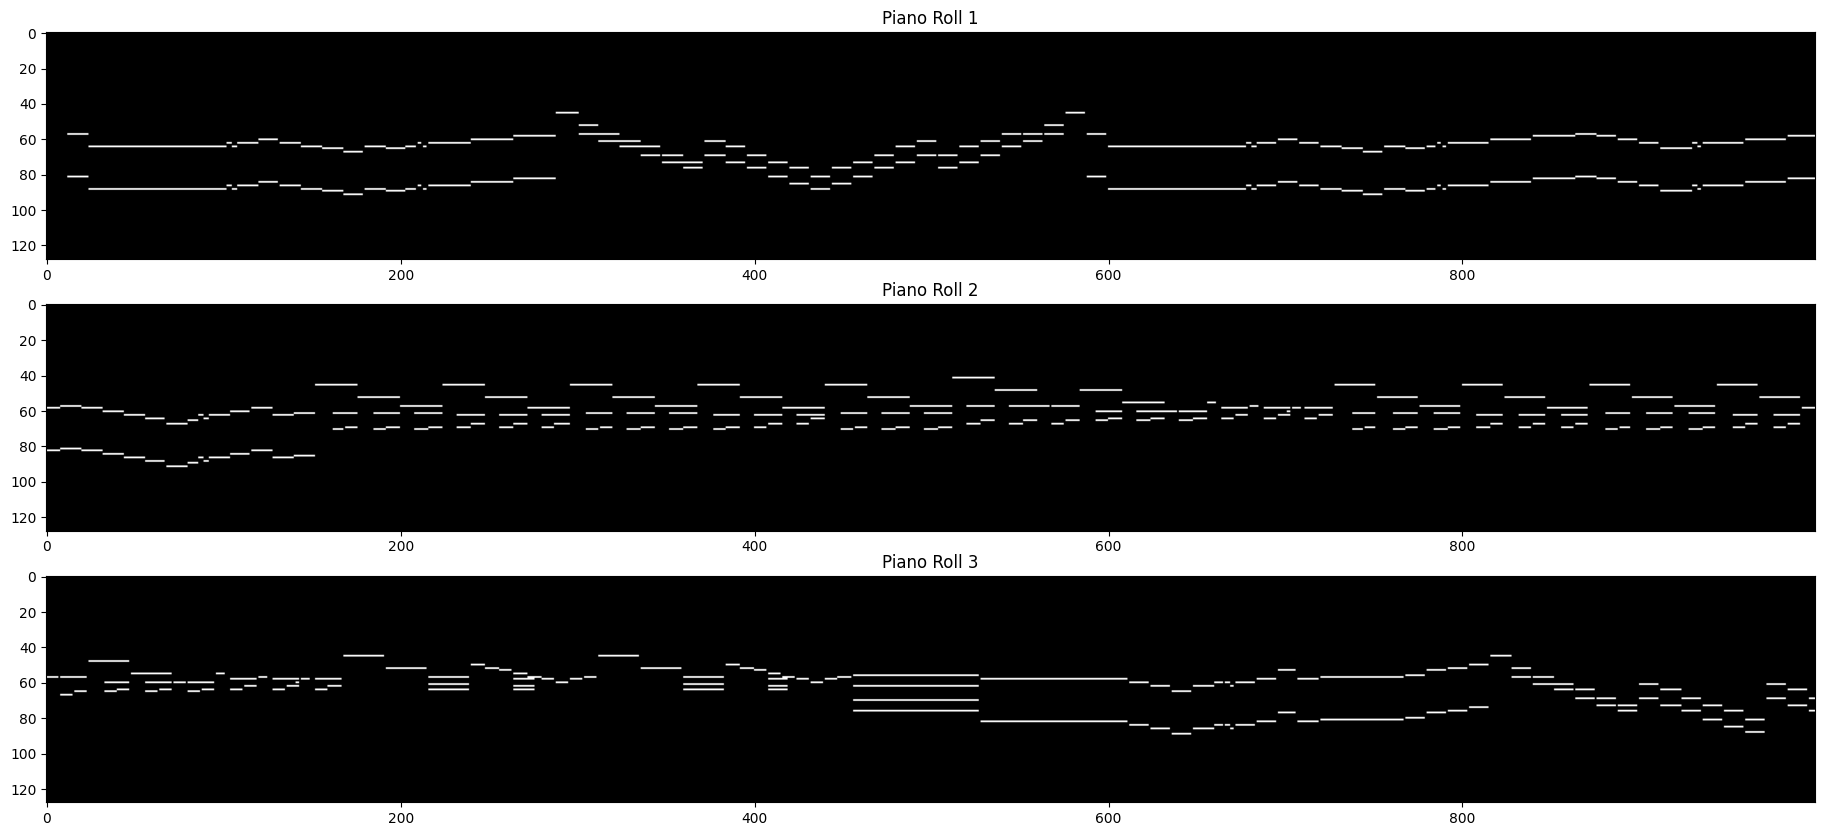

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(50, 10))

axs[0].imshow(np.transpose(piano_rolls[0]), cmap="gray")
axs[0].set_title("Piano Roll 1")

axs[1].imshow(np.transpose(piano_rolls[1]), cmap="gray")
axs[1].set_title("Piano Roll 2")

axs[2].imshow(np.transpose(piano_rolls[3]), cmap="gray")
axs[2].set_title("Piano Roll 3")

plt.show()

Сохранение и загрузка piano_rolls (Будет нужно для обучения и генерации)

In [37]:
np.save('input-data/piano_rolls/classical/piano_rolls.npy', piano_rolls)

## Обратное преобразование сгенерированных piano roll

In [21]:
generated_piano_rolls = np.load('generated/piano_rolls/classical/piano_rolls.npy', allow_pickle=True)
#Делаем громкость максимальной
generated_piano_rolls = generated_piano_rolls*127

In [22]:
midi = pianoroll_to_midi([generated_piano_rolls[0]], "generated/tmp/example_out.mid")

Увеличение темпа (преобразование в piano roll, почти в два раза замедляет midi)

In [13]:
files_path = "generated/tmp/*.mid"
for file, i in zip(glob.glob(files_path), range(len(glob.glob(files_path)))):
    mid = mido.MidiFile(file)

    new_tempo = mido.bpm2tempo(240)
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                msg.tempo = new_tempo

    mid.save("generated/tmp/speedup_example_out_" + str(i) + ".mid")
